# Análise Experimento 4

In [ ]:
import pandas as pd

caminho_csv = './resultados_experimento4MOCADO.csv'

df = pd.read_csv(caminho_csv)

df.head()

,n,pop_size,geracoes,elite_rate,mutation_rate,melhor_solucao,melhor_custo,tempo_execucao_s,geracao_melhor_custo,configuracao,elitism,selection,crossover,mutation
0,10,100,100,0.2,0.1,[3 0 9 4 6 1 8 5 7 2],6538.0,2.390624,57,"{'selection': 'tournament', 'crossover': 'mpx'...",tournament,tournament,mpx,swap
1,10,100,100,0.2,0.1,[9 5 8 0 2 6 3 1 4 7],6654.0,2.410197,13,"{'selection': 'tournament', 'crossover': 'mpx'...",tournament,tournament,mpx,insertion
2,10,100,100,0.2,0.1,[8 1 0 6 7 5 4 3 2 9],6663.0,2.330290,16,"{'selection': 'tournament', 'crossover': 'mpx'...",tournament,tournament,mpx,swap
3,10,100,100,0.2,0.1,[3 0 6 7 1 4 5 8 9 2],6893.0,2.272324,8,"{'selection': 'tournament', 'crossover': 'mpx'...",tournament,tournament,mpx,insertion
4,10,100,100,0.2,0.1,[8 4 2 9 5 7 3 1 6 0],7326.0,2.370980,20,"{'selection': 'tournament', 'crossover': 'mpx'...",tournament,tournament,mpx,swap


In [18]:
import ast

# Converte a string da coluna 'configuracao' para dicionário e expande em colunas
config_df = df['configuracao'].apply(lambda x: ast.literal_eval(x)).apply(pd.Series)

# Renomeia as colunas, se necessário
config_df.rename(columns={'selection': 'selection_type', 'crossover': 'crossover_type', 'mutation': 'mutation_type', 'elitism': 'elitismo' }, inplace=True)

# Concatena o DataFrame original com as novas colunas
df_expanded = pd.concat([df.drop(columns=['configuracao']), config_df], axis=1)
df_expanded.head()

,n,pop_size,geracoes,elite_rate,mutation_rate,melhor_solucao,melhor_custo,tempo_execucao_s,geracao_melhor_custo,elitism,selection,crossover,mutation,selection_type,crossover_type,elitismo,mutation_type
0,10,100,100,0.2,0.1,[3 0 9 4 6 1 8 5 7 2],6538.0,2.390624,57,tournament,tournament,mpx,swap,tournament,mpx,tournament,swap
1,10,100,100,0.2,0.1,[9 5 8 0 2 6 3 1 4 7],6654.0,2.410197,13,tournament,tournament,mpx,insertion,tournament,mpx,tournament,insertion
2,10,100,100,0.2,0.1,[8 1 0 6 7 5 4 3 2 9],6663.0,2.330290,16,tournament,tournament,mpx,swap,tournament,mpx,tournament,swap
3,10,100,100,0.2,0.1,[3 0 6 7 1 4 5 8 9 2],6893.0,2.272324,8,tournament,tournament,mpx,insertion,tournament,mpx,tournament,insertion
4,10,100,100,0.2,0.1,[8 4 2 9 5 7 3 1 6 0],7326.0,2.370980,20,tournament,tournament,mpx,swap,tournament,mpx,tournament,swap


In [19]:
fitness_means = df_expanded.groupby('mutation')['melhor_custo'].mean().reset_index(name='mean_fitness')
fitness_stds = df_expanded.groupby('mutation')['melhor_custo'].std().reset_index(name='std_fitness')
time_means = df_expanded.groupby('mutation')['tempo_execucao_s'].mean().reset_index(name='mean_execution_time')
geracao_means = df_expanded.groupby('mutation')['geracao_melhor_custo'].mean().reset_index(name='mean_generation_best_cost')

# Juntando tudo em um único DataFrame
analysis_summary = fitness_means.merge(fitness_stds, on='mutation') \
                                .merge(time_means, on='mutation') \
                                .merge(geracao_means, on='mutation')

analysis_summary


,mutation,mean_fitness,std_fitness,mean_execution_time,mean_generation_best_cost
0,insertion,6390.65,1133.282530,2.672742,11.90
1,swap,6304.80,1107.712513,2.613117,24.25


## Análise do Custo Médio

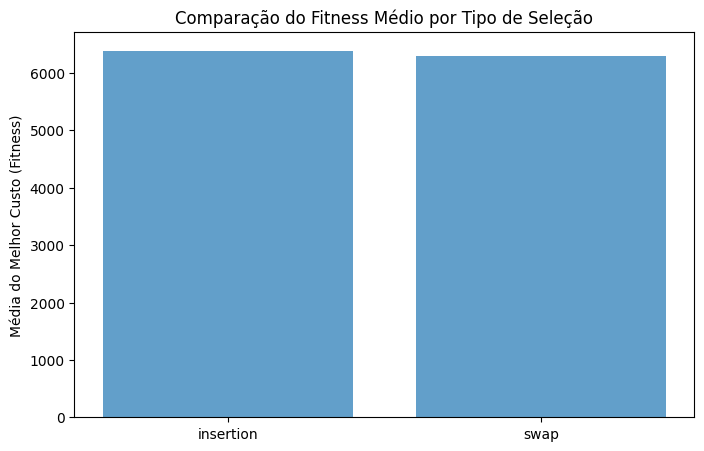

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['mutation'], analysis_summary['mean_fitness'], alpha=0.7)
plt.ylabel('Média do Melhor Custo (Fitness)')
plt.title('Comparação do Fitness Médio por Tipo de Seleção')
plt.show()



## Análise de Tempo Médio de Execução

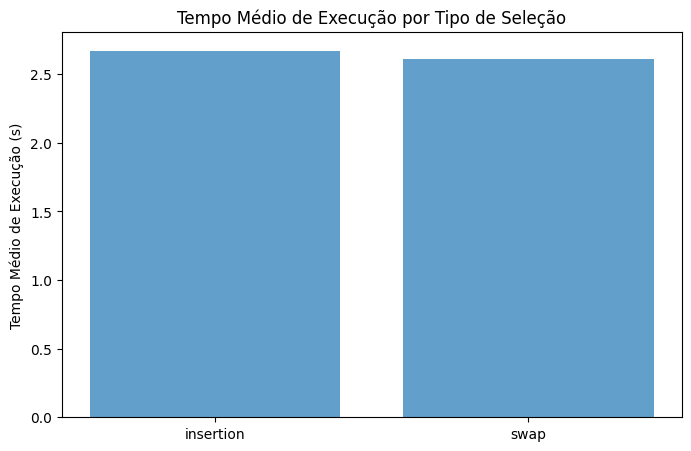

In [13]:
plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['mutation'], analysis_summary['mean_execution_time'], alpha=0.7)
plt.ylabel('Tempo Médio de Execução (s)')
plt.title('Tempo Médio de Execução por Tipo de Seleção')
plt.show()


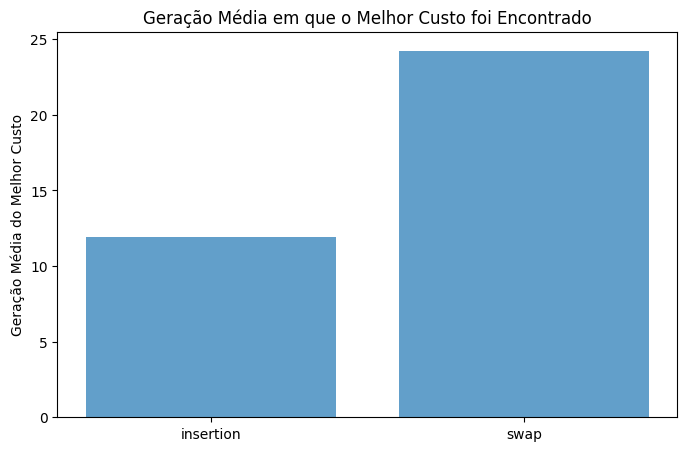

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['mutation'], analysis_summary['mean_generation_best_cost'], alpha=0.7)
plt.ylabel('Geração Média do Melhor Custo')
plt.title('Geração Média em que o Melhor Custo foi Encontrado')
plt.show()


In [15]:
import pandas as pd

# Criar um DataFrame para armazenar os resultados da comparação, considerando empates corretamente
comparisons = []

for i in range(0, len(df), 2):
    row1 = df.iloc[i]
    row2 = df.iloc[i + 1]

    #  Comparação do melhor custo (fitness)
    if row1['melhor_custo'] < row2['melhor_custo']:
        melhor_custo_vencedor = row1['mutation']
    elif row1['melhor_custo'] > row2['melhor_custo']:
        melhor_custo_vencedor = row2['mutation']
    else:
        melhor_custo_vencedor = 'empate'

    #  Comparação do tempo (geração do melhor custo)
    if row1['geracao_melhor_custo'] < row2['geracao_melhor_custo']:
        geracao_vencedor = row1['mutation']
    elif row1['geracao_melhor_custo'] > row2['geracao_melhor_custo']:
        geracao_vencedor = row2['mutation']
    else:
        geracao_vencedor = 'empate'

    comparisons.append({
        'par': i // 2 + 1,
        'melhor_custo_vencedor': melhor_custo_vencedor,
        'geracao_vencedor': geracao_vencedor
    })

# Transformar os resultados em DataFrame
comparison_df = pd.DataFrame(comparisons)

# Contagem de vitórias e empates em cada categoria
melhor_custo_counts = comparison_df['melhor_custo_vencedor'].value_counts().reset_index()
melhor_custo_counts.columns = ['resultado', 'vezes_melhor_custo']

geracao_counts = comparison_df['geracao_vencedor'].value_counts().reset_index()
geracao_counts.columns = ['resultado', 'vezes_mais_rapido']

#  Unir os resultados em uma tabela final
final_comparison = pd.merge(melhor_custo_counts, geracao_counts, on='resultado', how='outer').fillna(0)

final_comparison

,resultado,vezes_melhor_custo,vezes_mais_rapido
0,empate,1,0.0
1,insertion,2,14.0
2,swap,17,6.0


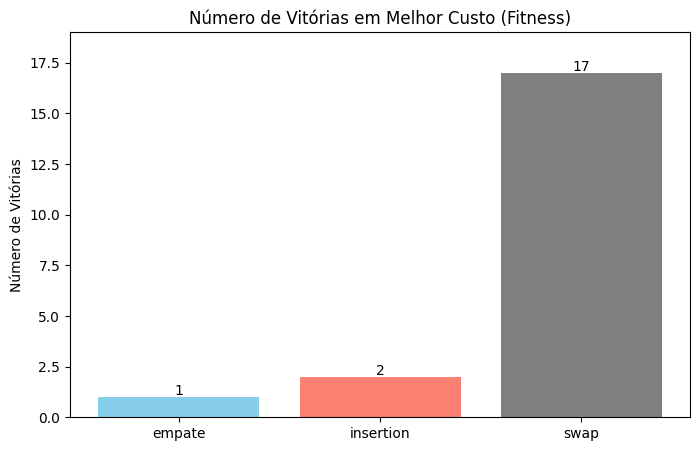

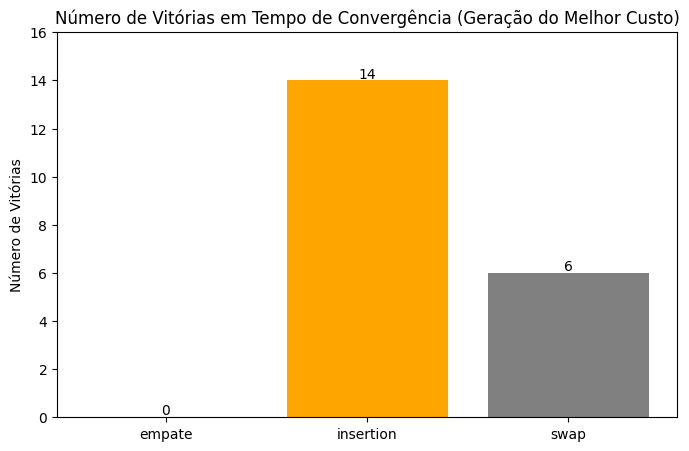

In [16]:
# Gráfico de barras: Número de vitórias em Melhor Custo
plt.figure(figsize=(8, 5))
plt.bar(final_comparison['resultado'], final_comparison['vezes_melhor_custo'], color=['skyblue', 'salmon', 'gray'])
plt.ylabel('Número de Vitórias')
plt.title('Número de Vitórias em Melhor Custo (Fitness)')
plt.ylim(0, final_comparison[['vezes_melhor_custo']].values.max() + 2)
for index, value in enumerate(final_comparison['vezes_melhor_custo']):
    plt.text(index, value + 0.1, str(int(value)), ha='center')
plt.show()

#  Gráfico de barras: Número de vitórias em Tempo de Convergência
plt.figure(figsize=(8, 5))
plt.bar(final_comparison['resultado'], final_comparison['vezes_mais_rapido'], color=['lightgreen', 'orange', 'gray'])
plt.ylabel('Número de Vitórias')
plt.title('Número de Vitórias em Tempo de Convergência (Geração do Melhor Custo)')
plt.ylim(0, final_comparison[['vezes_mais_rapido']].values.max() + 2)
for index, value in enumerate(final_comparison['vezes_mais_rapido']):
    plt.text(index, value + 0.1, str(int(value)), ha='center')
plt.show()

plt.show()
